#Project 1

Avik Bhattacharya

* In regression problems there is a continuous output(dependent) variable that we try to predict it's value within a range of input features.
* There is noise(ϵ) which means for esentially the same input there can be slightly different values for the output.
  * The assumption is that noise follows a normal distribution with a mean of 0 and an unknown standard distribution.
* A simple representation is $y = f(X) + \sigma \epsilon$

##Linear Regression

* For linear regression, the prediction of the output is a weighted combination of input features.
  * The weights can be positive or negative.
  * $\text{Predicted Value} = weight_1 ⋅ \text{Feature}_1 + weight_2 ⋅ \text{Feature}_2 + ... + weight_n ⋅ \text{Feature}_n$

##Locally Weighted Regression

* Regardless if a trend/association is linear or not, they can be interpreted linearly at a local level.
  * However, local properties are dependent on the method we use to calculate the distance between observations.

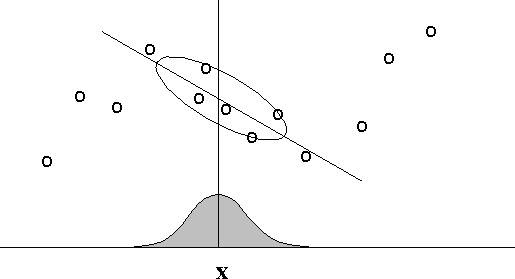

The image above shows the basic idea of how to approach locally weighted regression.
* A non-linear trend can be interpreted linearly in a specific area(the circled area).
* Kernels(the shaded area), Gaussian and similar shapes, are used in solving local linear regression methods.
  * Local weighted regression is done where the kernel is greater than 0.

###Comparing Linear Regression to Locally Weighted Regression

####Imports & etc...

In [42]:
#Importing libraries for high quality graphs
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [43]:
#Libraries of necessary functions
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from scipy import linalg
from sklearn.linear_model import LinearRegression

In [80]:
import scipy.stats as stats
import statsmodels.api as sm
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')

In [44]:
#Importing data
cars = pd.read_csv("drive/MyDrive/ADV Applied Machine Learning/Module 1/Day 1 & 2/mtcars.csv")

In [66]:
xshow = np.linspace(-1,1,201)

####Linear Regression

In [52]:
#The miles per gallon is the variable we are trying to predict.
y = cars['mpg'].values
#In order to plot the data, weight was selected to be the input variable used.
x = cars['wt'].values

In [22]:
#This sets up the basic linear regression.
lm = linear_model.LinearRegression()
model = lm.fit(x.reshape(-1, 1),y)
#The reason 1.0 and 6.0 are used down below is so that the plotted line will go from end to end on the graph.
xhat = np.array([1.0, 6.0]).reshape(-1, 1)
yhat = lm.predict(xhat)

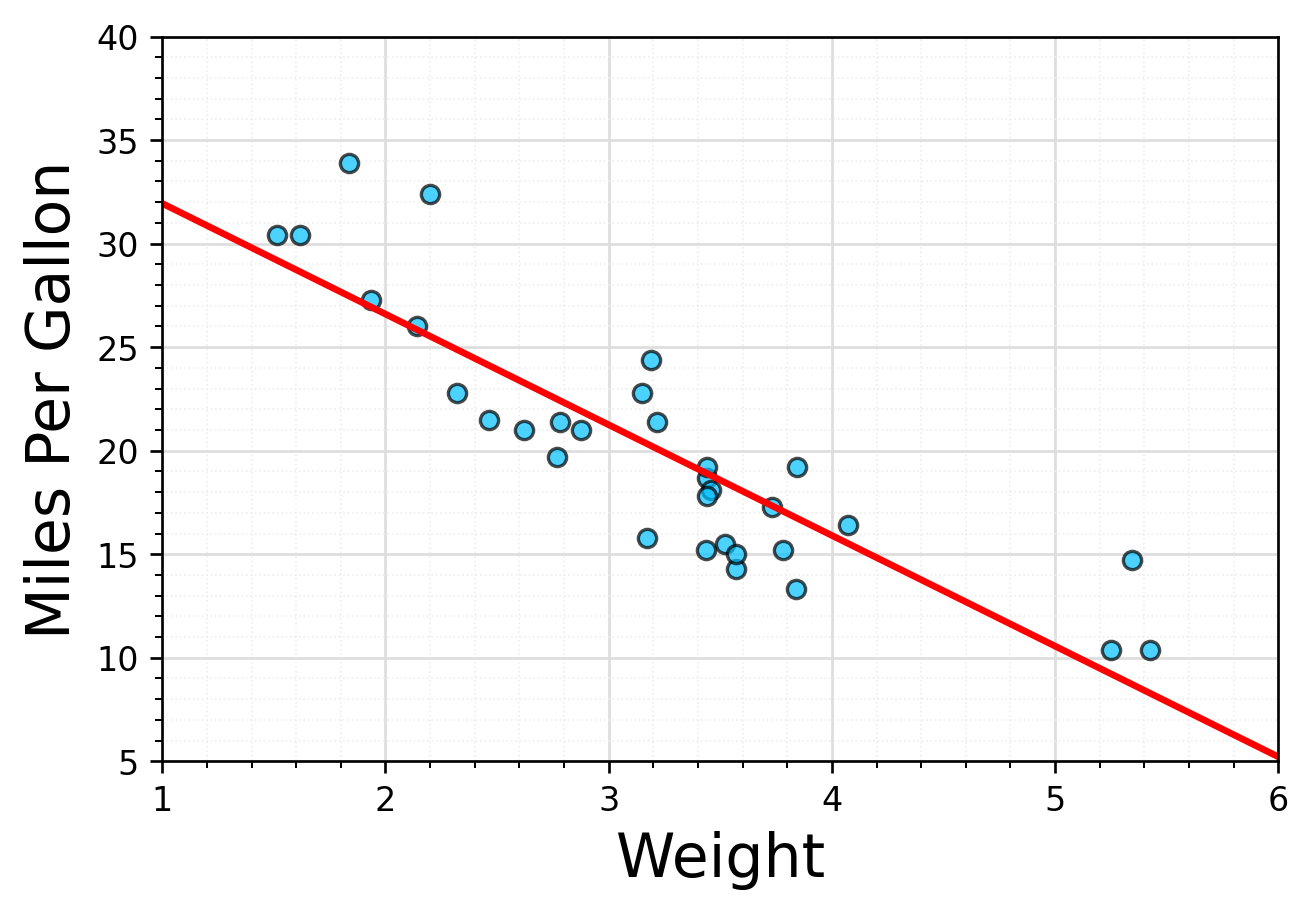

In [23]:
#Plotting the graph
fig, ax = plt.subplots(1,1)
plt.plot(xhat, yhat, '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()

As is shown, the linear regression gives a rough model to predict the data but doesn't capture the more subtle trends.

####Locally Weighted Regression

In [15]:
#This is a basic bell-shaped kernel that will be used in plotting.
def kernel_function(xi, x0, tau= .005): 
    return np.exp(-(xi-x0)**2/(2*tau))

#Creates matrix of weights using kernel function
def weights_matrix(x,tau):
  n=len(x)
  return np.array([kernel_function(x, x[i], tau) for i in range(n)])

#This is the core function behind Locally Weighted Regression or lowess/loess
#It creates a prediction for the output that is comprised of multiple local linear regressions.
#There is also a prebuilt lowess function in the statsmodel package, that creates similar prediction curves.
def lowess_bell_shape_kern(x, y, tau = .005):
  n = len(x)
  yest = np.zeros(n)

  #Initializing weights
  w = weights_matrix(x, tau)    
    
  #Looping through all x-points
  for i in range(n):
    weights = w[:, i]
    lm.fit(np.diag(w[:,i]).dot(x.reshape(-1,1)),np.diag(w[:,i]).dot(y.reshape(-1,1)))
    yest[i] = lm.predict(x[i].reshape(-1,1)) 

  return yest

In [47]:
#Since tau dictates the width of the kernel, a higher tau creates a smoother prediction curve.
yhat = lowess_bell_shape_kern(x,y, tau=.03)

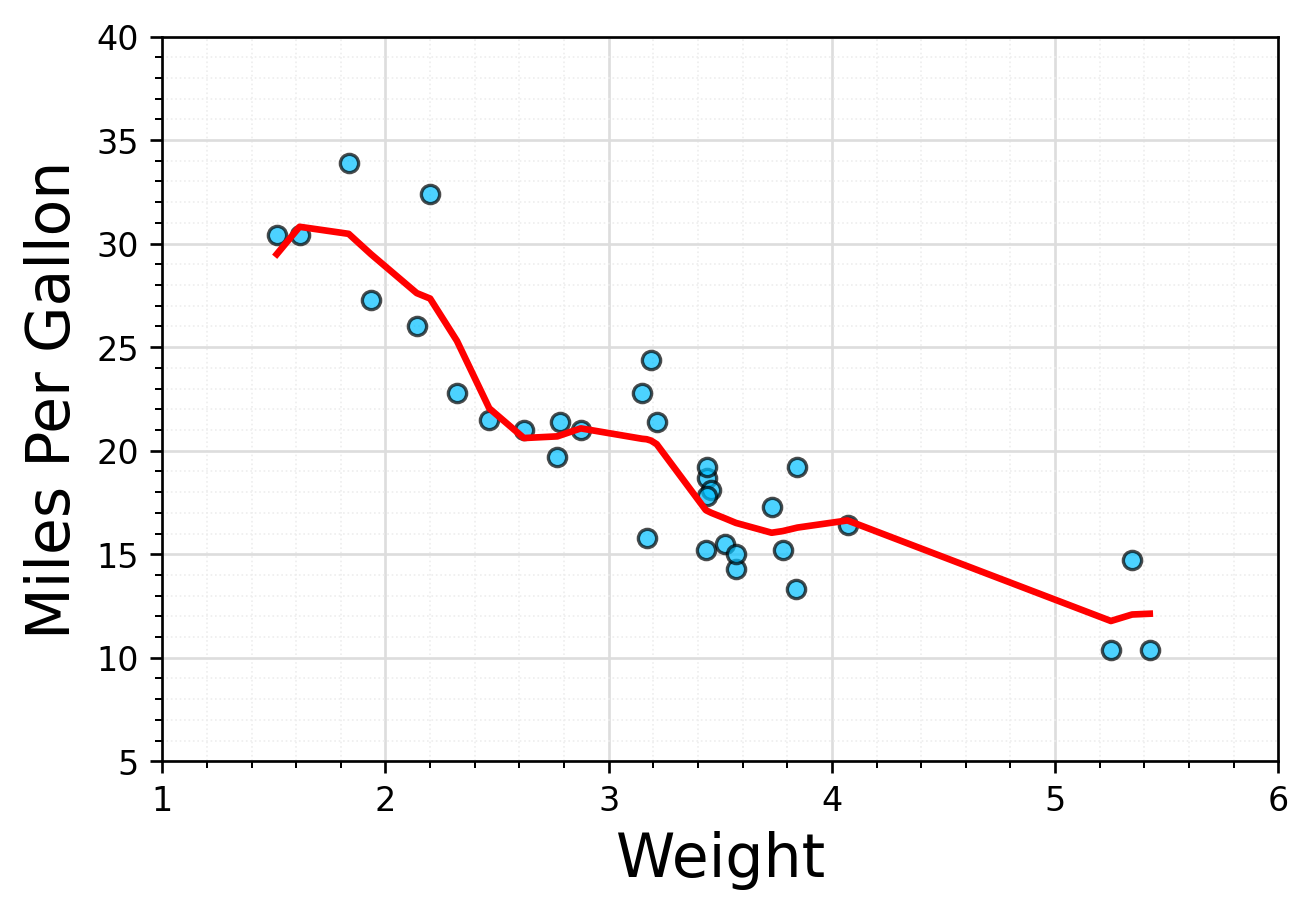

In [64]:
#Graphing the locally weighted regression.
fig, ax = plt.subplots(1,1)
plt.plot(x[np.argsort(x)], yhat[np.argsort(x)], '-',color='red',lw=2)
plt.scatter(x,y,color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()

As you can see above, you are still able to represent the trend/relationship linearly but you don't miss out on as many smaller trends. As you will see below, an even lower tau(0.001) makes a rougher prediction curve but one that captures even more trends.

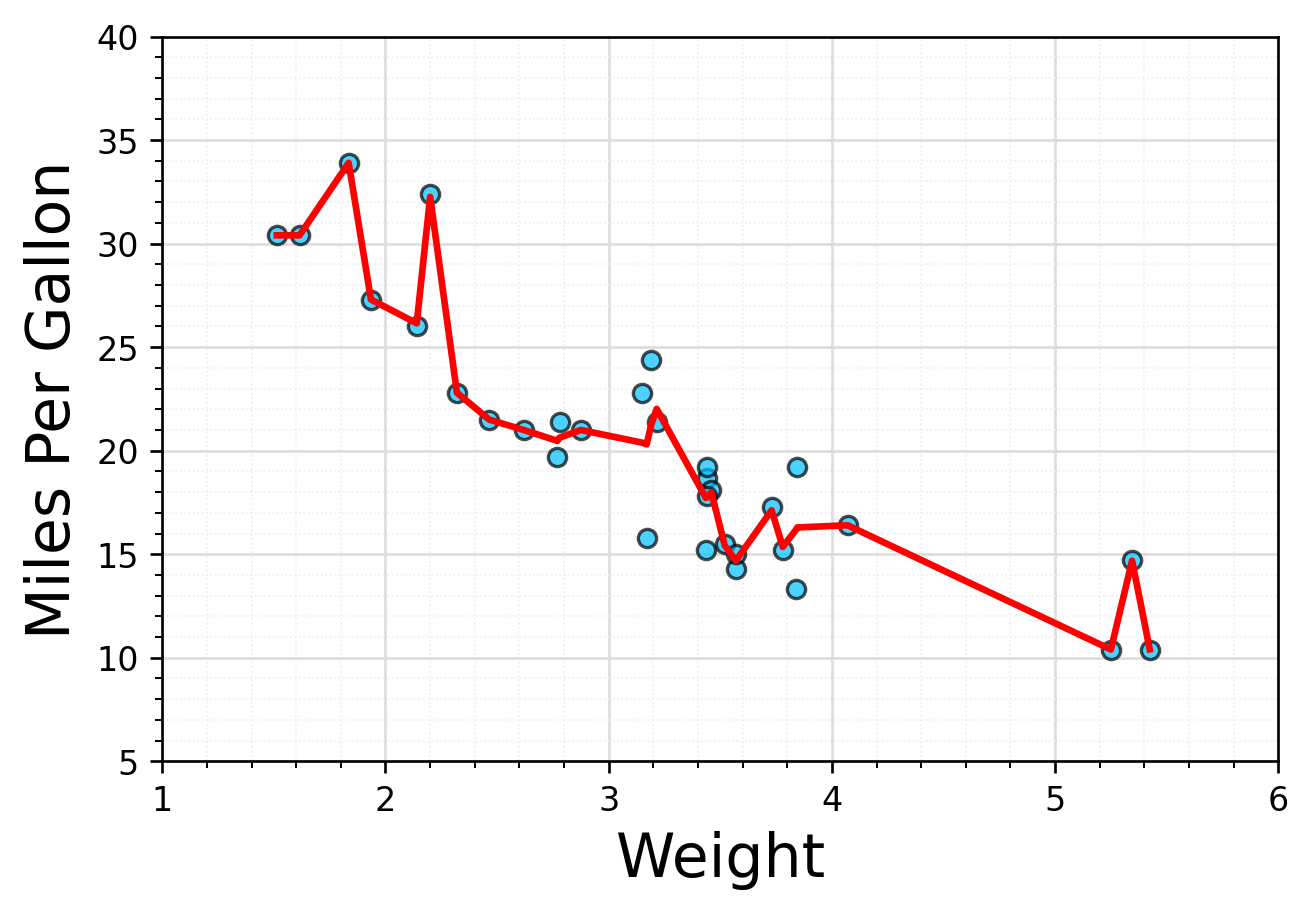

In [27]:
yhat1 = lowess_bell_shape_kern(x,y, tau=.001)
fig, ax = plt.subplots(1,1)
plt.plot(x[np.argsort(x)], yhat1[np.argsort(x)], '-',color='red',lw=2)
plt.scatter(cars["wt"],cars["mpg"],color='deepskyblue',ec='k',s=30,alpha=0.7)
plt.xlim(1,6)
plt.ylim(5,40)
plt.xlabel('Weight',fontsize=18)
plt.ylabel('Miles Per Gallon',fontsize=18)
ax.grid()
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.set_axisbelow(True)
plt.minorticks_on()

###Kernels

There are multiple types of kernels that can be used for locally weighted regression. The goal is to use one with one local maximum that has compact support.

There is the exponential kernel which we used in the graphs above.
* The Exponential Kernel: $ K(x):= e^{-\frac{\|x\|^2}{2\tau}}$

In [65]:
def exponential(x):
  return np.exp(-(x)**2/(2))

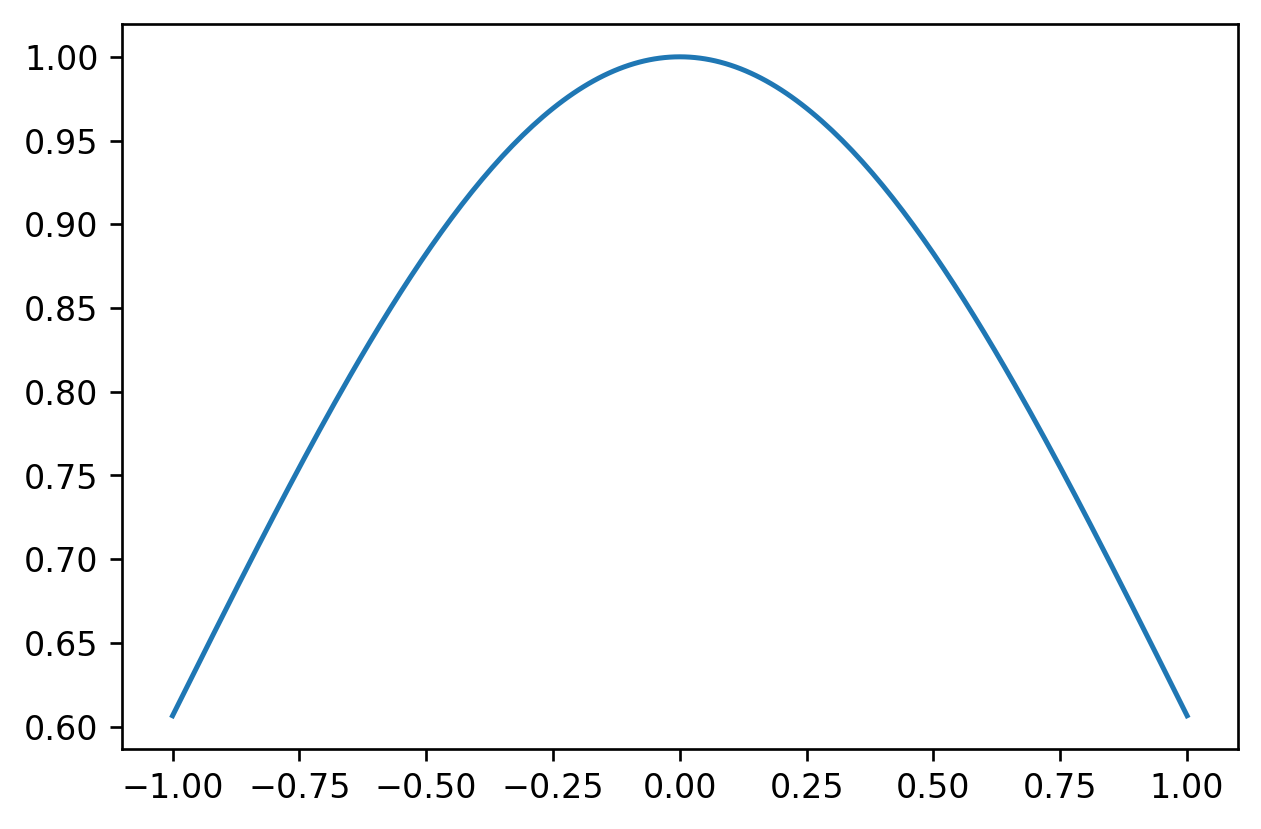

In [69]:
yshow = exponential(xshow)
plt.plot(xshow,yshow)
plt.show()

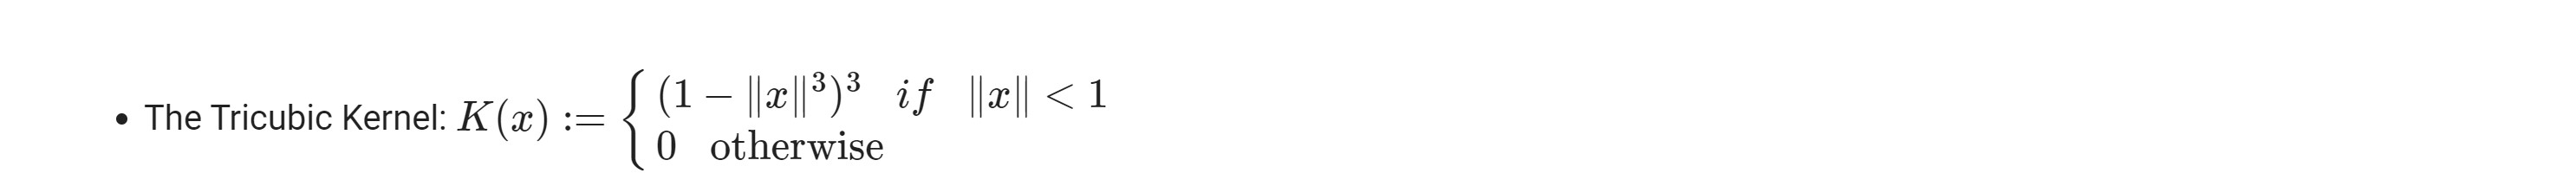

In [70]:
def tricubic(x):
  return np.where(np.abs(x)>1,0,(1-np.abs(x)**3)**3)

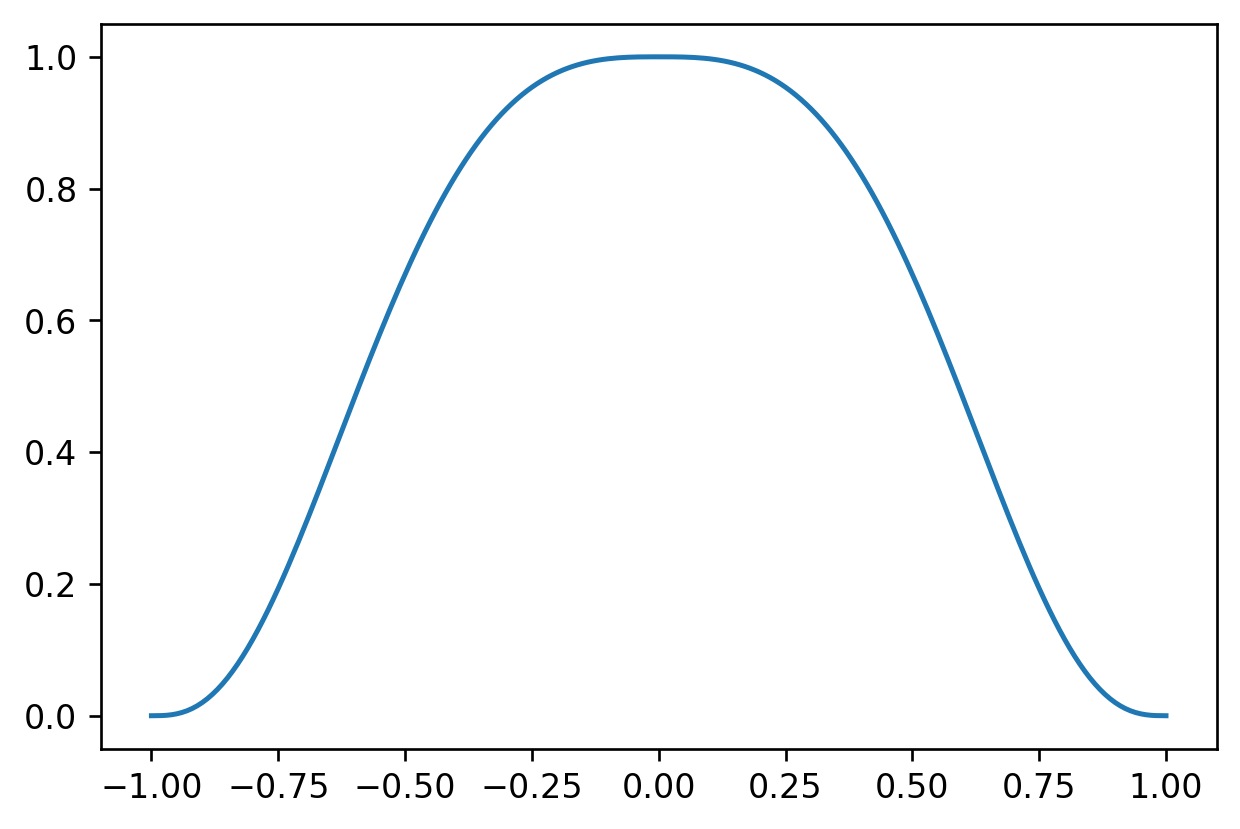

In [71]:
yshow = tricubic(xshow)
plt.plot(xshow,yshow)
plt.show()

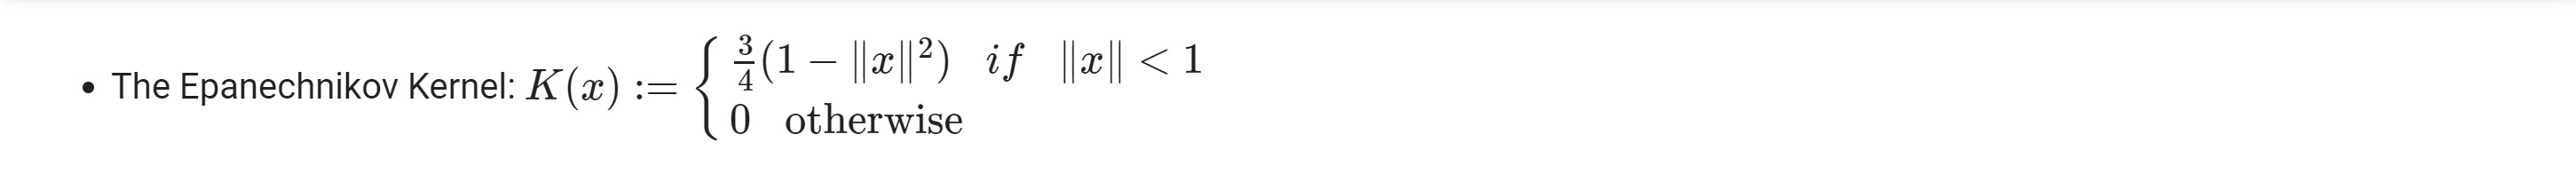

In [72]:
def Epanechnikov(x):
  return np.where(np.abs(x)>1,0,3/4*(1-np.abs(x)**2))

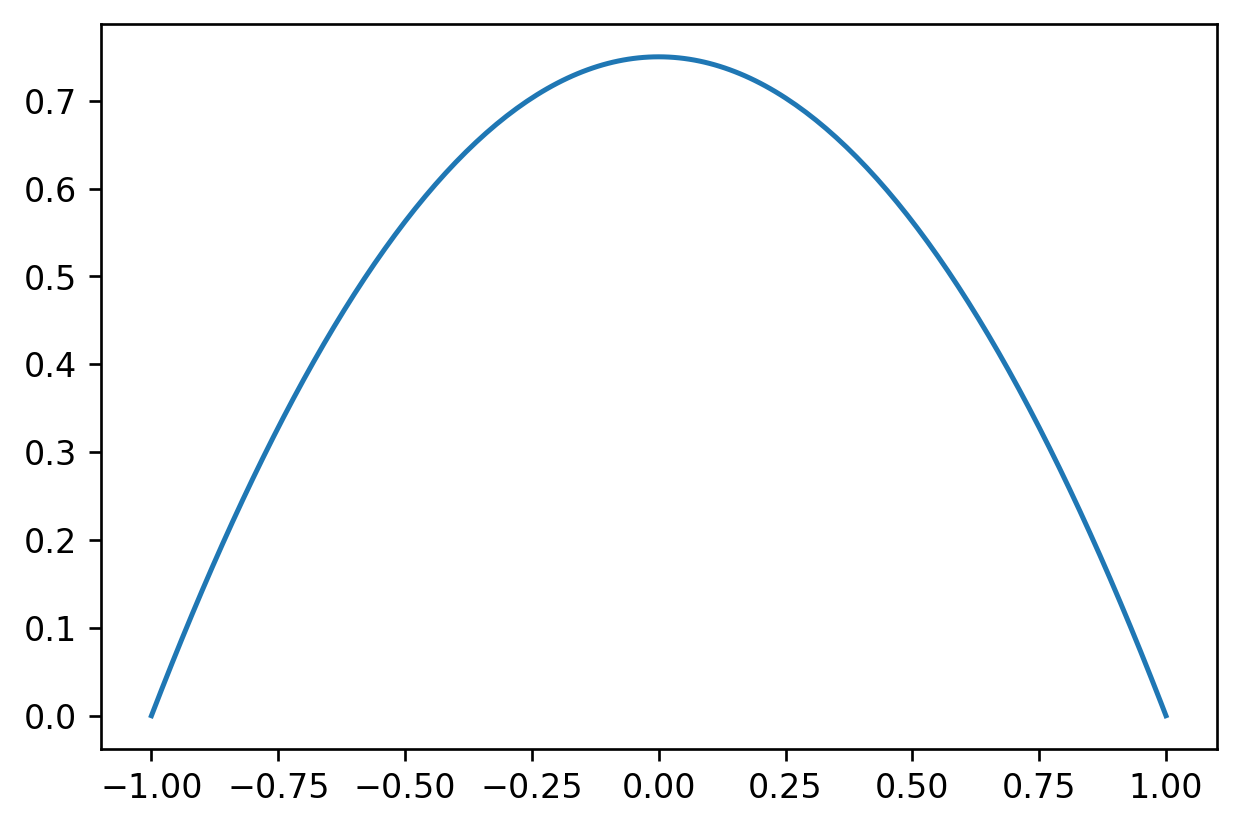

In [73]:
yshow = Epanechnikov(xshow)
plt.plot(xshow,yshow)
plt.show()

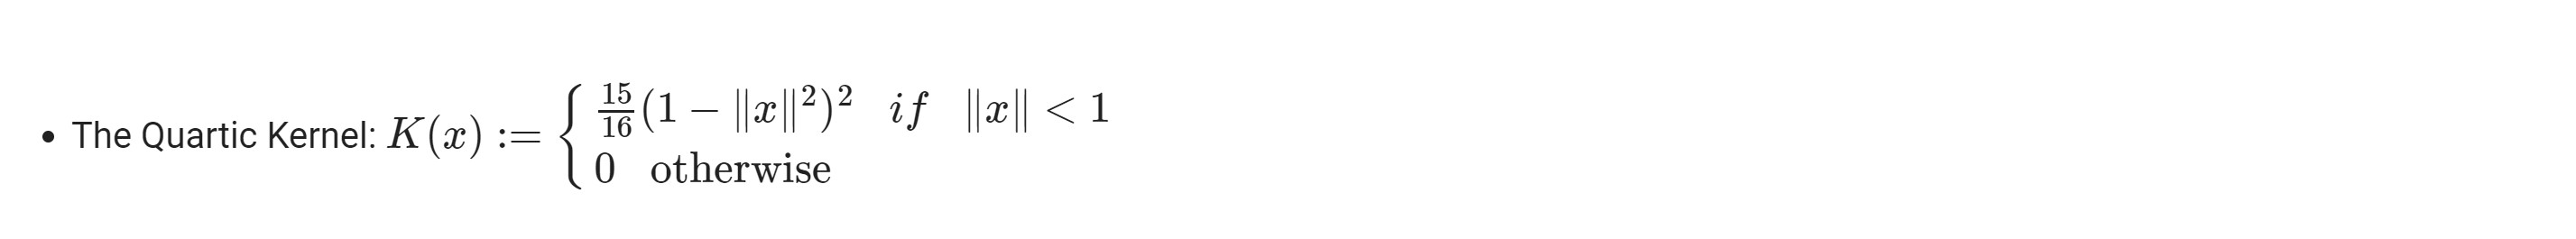

In [75]:
def Quartic(x):
  return np.where(np.abs(x)>1,0,15/16*((1-np.abs(x)**2)**2))

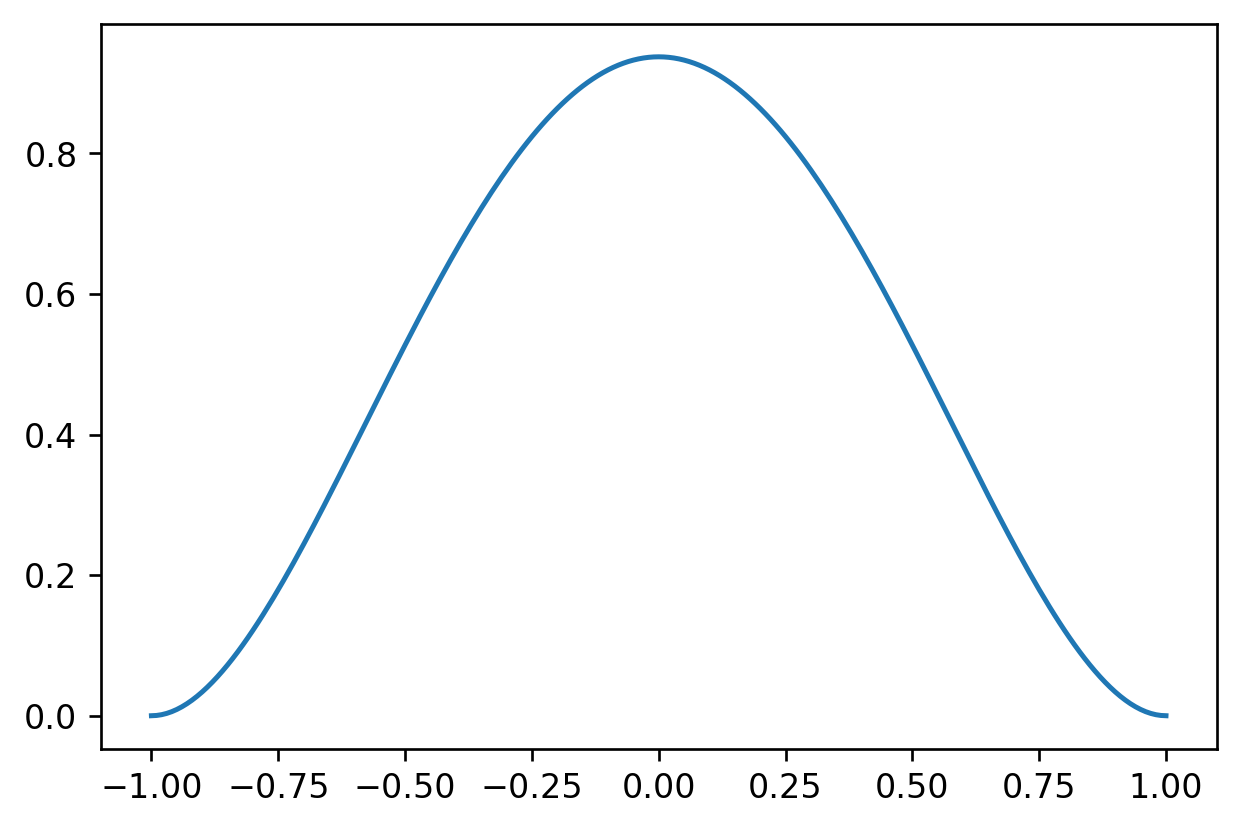

In [76]:
yshow = Quartic(xshow)
plt.plot(xshow,yshow)
plt.show()

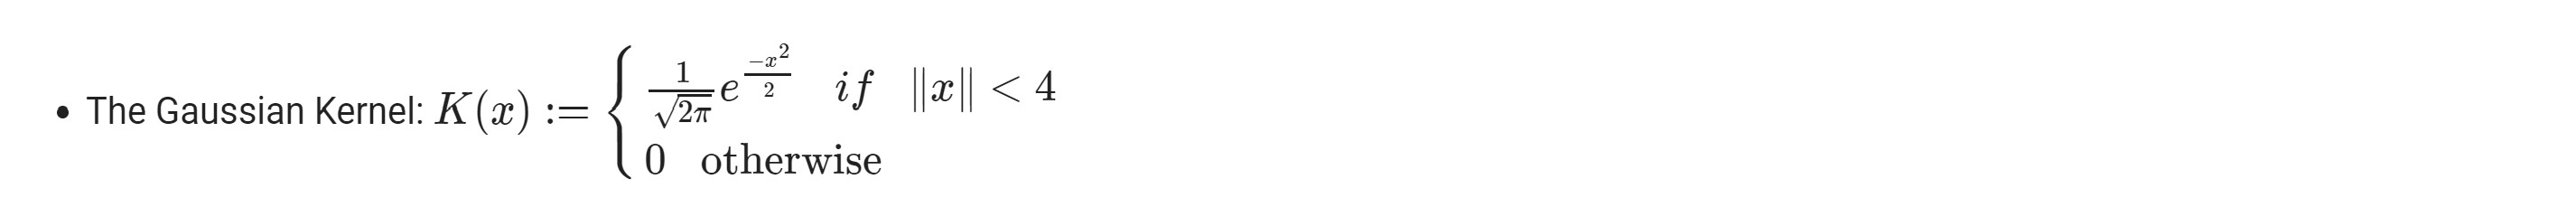

In [77]:
def Gaussian(x):
  return np.where(np.abs(x)>4,0,1/(np.sqrt(2*np.pi))*np.exp(-1/2*x**2))

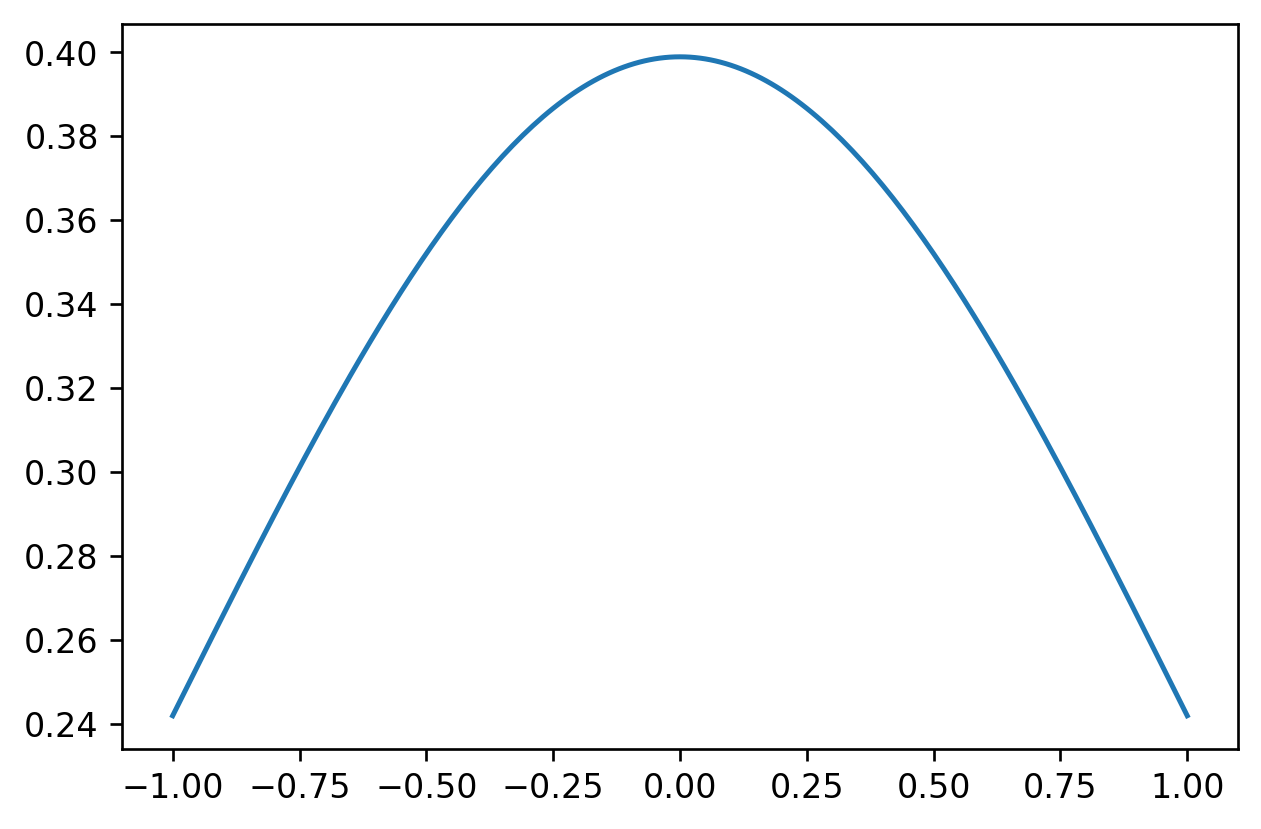

In [78]:
yshow = Gaussian(xshow)
plt.plot(xshow,yshow)
plt.show()

In [85]:
#The kernels above would be used like so.
def kernel_function(xi, x0, tau, kern=tricubic):
    return kern((xi - x0)/(2*tau))

###Gramfort's Version of Lowess

An individual called Alex Gramfort created a different version of lowess that has similarities with the statsmodel lowess.

In [82]:
#The greater the f value, the greater the smoothing span so it acts similarly to tau.
#This function doesn't call to a kernel or other function.
def lowess_ag(x, y, f=2. / 3., iter=3):
  n = len(x)
  r = int(ceil(f * n))
  h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
  w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
  w = (1 - w ** 3) ** 3
  yest = np.zeros(n)
  delta = np.ones(n)
  for iteration in range(iter):
    for i in range(n):
      weights = delta * w[:, i]
      b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
      A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
      beta = linalg.solve(A, b)
      yest[i] = beta[0] + beta[1] * x[i]
    residuals = y - yest
    s = np.median(np.abs(residuals))
    delta = np.clip(residuals / (6.0 * s), -1, 1)
    delta = (1 - delta ** 2) ** 2

  return yest

####Background Code 2

In [83]:
x = np.linspace(0,4,400)
noise = np.random.normal(loc = 0, scale = .8, size = 400)
y = np.sin(x**2 * 1.5 * np.pi ) 
y_noise = y + noise

####Comparing Standard Lowess and Gramfort Lowess

In [86]:
#This is setting up a standard tricubic lowess and the Gramfort lowess.
tau = 0.009
yhat_kern = lowess_bell_shape_kern(x,y,tau)

f = 0.02
yest = lowess_ag(x, y, f=f, iter=3)

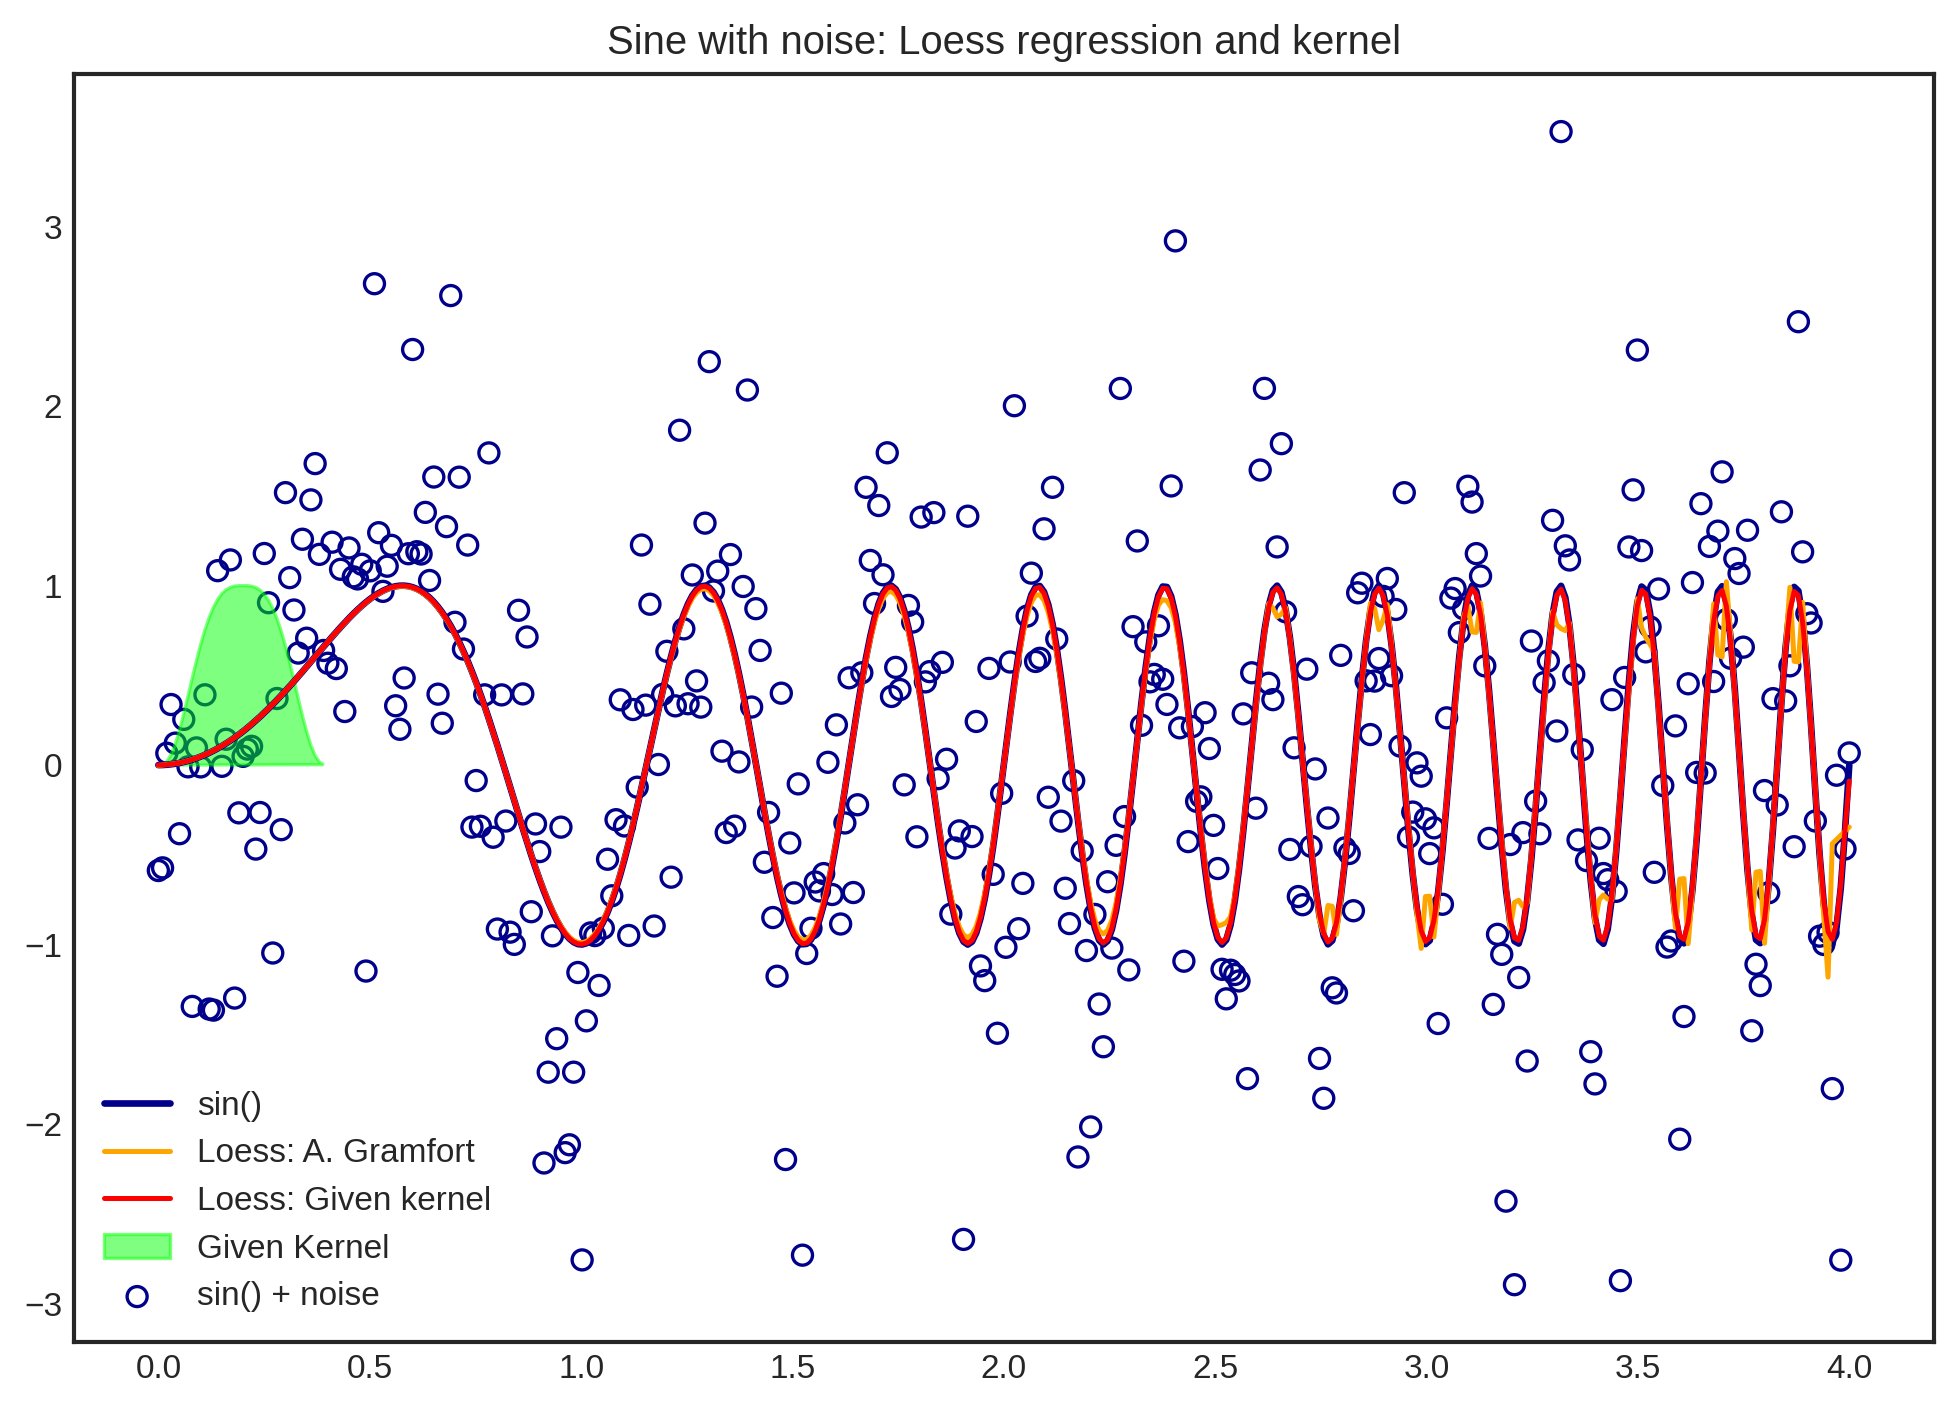

In [89]:
plt.figure(figsize=(10,7))
plt.plot(x,y,color = 'darkblue', label = 'sin()',lw=2)
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sin() + noise')
plt.fill(x[:40],kernel_function(x[:40],0.2,0.1), color = 'lime', alpha = .5, label = 'Given Kernel')
plt.plot(x,yest,color = 'orange', label = 'Loess: A. Gramfort')
plt.plot(x,yhat_kern,color = 'red', label = 'Loess: Given kernel')
plt.legend()
plt.title('Sine with noise: Loess regression and kernel')
plt.show()

As the above graph shows, the Gramfort Lowess is fairly similar to a standard lowess but it seems to be a tad less smooth.